In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd
from numpy.random import randn
import re
from PyEMD import EMD

import wfdb

True love is like alien life: I believe it's out there in the Universe but probably its to far away to reach me in this lifetime

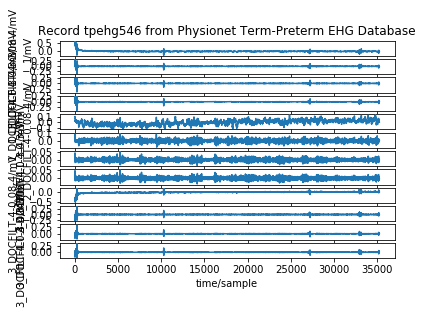

{'record_name': 'tpehg546',
 'n_sig': 12,
 'fs': 20,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 35260,
 'base_time': None,
 'base_date': None,
 'comments': ['Comments:',
  'RecID 546',
  'Gestation 31',
  'Rectime 23.1',
  'Age 31',
  'Parity 0',
  'Abortions 1',
  'Weight 58',
  'Hypertension no',
  'Diabetes no',
  'Placental_position end',
  'Bleeding_first_trimester yes',
  'Bleeding_second_trimester no',
  'Funneling negative',
  'Smoker no'],
 'sig_name': ['1',
  '1_DOCFILT-4-0.08-4',
  '1_DOCFILT-4-0.3-3',
  '1_DOCFILT-4-0.3-4',
  '2',
  '2_DOCFILT-4-0.08-4',
  '2_DOCFILT-4-0.3-3',
  '2_DOCFILT-4-0.3-4',
  '3',
  '3_DOCFILT-4-0.08-4',
  '3_DOCFILT-4-0.3-3',
  '3_DOCFILT-4-0.3-4'],
 'p_signal': array([[ 5.30098421e-01,  1.38857099e-02,  4.11993591e-03, ...,
         -1.14442664e-02, -3.43327993e-03, -9.38429847e-03],
        [ 5.27656977e-01,  8.02624552e-02,  2.70084688e-02, ...,
         -6.59189746e-02, -2.27359426e-02, -5.35591669e-02],
        [ 5.28038453e-01

In [2]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('/Users/madeleineanthonisen/Documents/Random/wfdb-python/term-preterm-ehg-database-1.0.1/tpehgdb/tpehg546') 
wfdb.plot_wfdb(record=record, title='Record tpehg546 from Physionet Term-Preterm EHG Database') 
#display(record.__dict__)
record_dict = record.__dict__

display(record_dict)

# Can also read the same files hosted on Physionet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
#record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')

In [42]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
signals, fields = wfdb.rdsamp('/Users/madeleineanthonisen/Documents/Random/wfdb-python/term-preterm-ehg-database-1.0.1/tpehgdb/tpehg546', channels=[0])
display(signals)
display(fields)

array([[ 0.53009842],
       [ 0.52765698],
       [ 0.52803845],
       ...,
       [-0.01426719],
       [-0.0140383 ],
       [-0.01358053]])

{'fs': 20,
 'sig_len': 35260,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['1'],
 'comments': ['Comments:',
  'RecID 546',
  'Gestation 31',
  'Rectime 23.1',
  'Age 31',
  'Parity 0',
  'Abortions 1',
  'Weight 58',
  'Hypertension no',
  'Diabetes no',
  'Placental_position end',
  'Bleeding_first_trimester yes',
  'Bleeding_second_trimester no',
  'Funneling negative',
  'Smoker no']}

In [43]:
type(fields)

dict

In [49]:
df = pd.DataFrame(randn(35240,300))
for i in range(734,735):
    mystring = 'tpehg'+str(i)
    signals, fields = wfdb.rdsamp('/Users/madeleineanthonisen/Documents/Random/wfdb-python/term-preterm-ehg-database-1.0.1/tpehgdb/'+mystring, channels=[0])
    df[str(i)] = signals
print(signals)
len(signals)

[[ 0.30411231]
 [ 0.30563821]
 [ 0.3025864 ]
 ...
 [-0.05180438]
 [-0.05172808]
 [-0.05172808]]


35240

In [61]:
df = pd.DataFrame(randn(24000,300))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 54.9 MB


In [144]:
#number of data points for half hour measurements at 20Hz 
print((3600/2)*20)

#cut first 5 minutes
print(5*60*20)

#cut last 5 minutes
print(25*60*20)


36000.0
6000
30000


In [145]:
def unpack_comments(comments):
    '''
    function to unpack comments and convert them to features
    '''
    features = []
    features.append(int(comments[1].split(" ")[1]))
    features.append(float(comments[2].split(" ")[1]))
    features.append(float(comments[3].split(" ")[1]))
    features.append((comments[4].split(" ")[1]))
    features.append((comments[5].split(" ")[1]))
    features.append((comments[6].split(" ")[1]))
    features.append((comments[7].split(" ")[1]))
    features.append(comments[8].split(" ")[1])
    features.append(comments[9].split(" ")[1])
    features.append(comments[10].split(" ")[1])
    features.append(comments[11].split(" ")[1])
    features.append(comments[12].split(" ")[1])
    features.append(comments[13].split(" ")[1])
    features.append(comments[14].split(" ")[1])
    return features
    #filename = filename.split(".")[0]

In [146]:
#make a dataframe to fill
#df1 = pd.DataFrame(randn(24000,301))
#df2 = pd.DataFrame(randn(24000,301))
df = pd.DataFrame(columns='RecID Gestation Rectime Age Parity Abortions Weight Hypertension Diabetes Ppos Bleed1T Bleed2T Funneling Smoker'.split())

directory_path = '/Users/madeleineanthonisen/Documents/Random/wfdb-python/term-preterm-ehg-database-1.0.1/tpehgdb/'
#directory = os.fsencode(directory_in_str)

#Loop to apply preprocessing to all files in directory
i=0
for file in os.listdir(directory_path):
    filename = os.fsdecode(file)
    #if filename.endswith(".dat") or filename.endswith(".hea"):
    if filename.endswith(".dat"):
        i+=1
        filename = filename.split(".")[0]
        #print(filename)
        signals, fields = wfdb.rdsamp('/Users/madeleineanthonisen/Documents/Random/wfdb-python/term-preterm-ehg-database-1.0.1/tpehgdb/'+filename, channels=[9,10])
        
        #cut for noise at start&end of recording
        signals = signals[6000:30000]
        
        #Get features from fields and put in df
        comments = fields['comments']
        features = unpack_comments(comments)
        s = pd.Series(features, index=df.columns)
        df = df.append(s, ignore_index=True)
        
        #use catch22 to get features
        #channel 9
        signals[:,0]
        
        
        #df[str(i)] = signals
        # print(os.path.join(directory, filename))
    else:
         continue
#print(features)
#print(i)
#print(len(signals))
#print(signals.shape)

In [143]:
df.head()

,RecID,Gestation,Rectime,Age,Parity,Abortions,Weight,Hypertension,Diabetes,Ppos,Bleed1T,Bleed2T,Funneling,Smoker
0,1391,35.6,24.4,25,0,0,65,no,no,front,no,no,negative,no
1,1346,37.3,22.1,41,2,0,75,no,yes,front,no,no,negative,no
2,583,40.4,31.0,24,None,None,105,None,None,front,no,no,negative,None
3,597,39.4,22.0,25,None,None,82,None,None,end,no,no,positive,None
4,1150,38.0,31.3,28,0,1,66,no,no,front,no,no,positive,no


In [156]:
signals[:,0]

array([ 0.00518807,  0.00442512,  0.00427253, ..., -0.00053407,
       -0.00099184, -0.0015259 ])

In [148]:
signals[::,0]

array([ 0.00518807,  0.00442512,  0.00427253, ..., -0.00053407,
       -0.00099184, -0.0015259 ])

In [44]:
#s = np.random.random(100)
emd = EMD()
IMFs = emd(signals[::,0])

In [41]:
signals.shape
#signals[::,0].shape

(24000, 2)

In [22]:
#s = np.random.random(100)
emd = EMD()
IMFs = emd(signals)

ValueError: Position or time array should be the same size as signal.

In [39]:
s2=np.reshape(signals,(100,-1))

In [40]:
s2.shape

(100, 360)

In [37]:
type(s)

numpy.ndarray

In [38]:
type(signals)

numpy.ndarray

In [56]:
x = np.array(signals)
x.shape

(1, 24000, 1)

/Users/madeleineanthonisen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


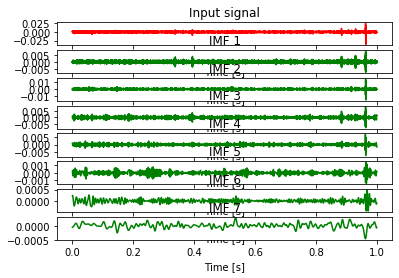

In [38]:
from PyEMD import EMD
import numpy  as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, len(signals))
#t = t.reshape(t.shape[0], -1)
#s = np.cos(11*2*np.pi*t*t) + 6*t*t
#s = s.reshape(s.shape[0], -1)

# Execute EMD on signal
IMF = EMD().emd(signals[::,0])
N = IMF.shape[0]+1

# Plot results
plt.subplot(N,1,1)
plt.plot(t, signals[::,0], 'r')
plt.title("Input signal")
plt.xlabel("Time [s]")

for n, imf in enumerate(IMF):
    plt.subplot(N,1,n+2)
    plt.plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")

plt.tight_layout()
plt.savefig('simple_example')
plt.show()



In [14]:
t.shape

(24000,)

In [63]:
t2 = t.reshape(t.shape[0], -1)

In [82]:
t2.shape

(24000, 1)

In [69]:
signals.shape

(24000, 1)

In [83]:
t2.reshape(t2.shape[0],).T

array([0.00000000e+00, 4.16684029e-05, 8.33368057e-05, ...,
       9.99916663e-01, 9.99958332e-01, 1.00000000e+00])

In [86]:
x = np.array([1, 2, 3, 4])
x.shape

(4,)

In [87]:
signals

array([[ 0.00518807],
       [ 0.00442512],
       [ 0.00427253],
       ...,
       [-0.00053407],
       [-0.00099184],
       [-0.0015259 ]])

In [25]:
import catch22
catch22.CO_f1ecac(tsData)

NameError: name 'tsData' is not defined

In [26]:
import os
import pandas as pd
import catch22

In [31]:
def giveMeFeatureVector(tsData):
    '''
    Returns a catch-22 feature vector from input time-series data
    '''
    features = dir(catch22)
    features = [item for item in features if not '__' in item]

    featureVector = []
    for testFun in features:
        featureFun = getattr(catch22,testFun)
        featureVector.append(featureFun(tsData))

    return featureVector

#-------------------------------------------------------------------------------

x = pd.read_csv('test.txt',header=None);
tsData = x[0].values.tolist()
fV = giveMeFeatureVector(tsData)

TypeError: 'module' object is not callable

In [33]:
catch22

<module 'catch22' from '/Users/madeleineanthonisen/opt/anaconda3/lib/python3.7/site-packages/catch22/__init__.py'>

In [34]:
import catch22_C

def catch22_all(data):

	features = [
	'DN_HistogramMode_5',
	'DN_HistogramMode_10',
	'CO_f1ecac',
	'CO_FirstMin_ac',
	'CO_HistogramAMI_even_2_5',
	'CO_trev_1_num',
	'MD_hrv_classic_pnn40',
	'SB_BinaryStats_mean_longstretch1',
	'SB_TransitionMatrix_3ac_sumdiagcov',
	'PD_PeriodicityWang_th0_01',
	'CO_Embed2_Dist_tau_d_expfit_meandiff',
	'IN_AutoMutualInfoStats_40_gaussian_fmmi',
	'FC_LocalSimple_mean1_tauresrat',
	'DN_OutlierInclude_p_001_mdrmd',
	'DN_OutlierInclude_n_001_mdrmd',
	'SP_Summaries_welch_rect_area_5_1',
	'SB_BinaryStats_diff_longstretch0',
	'SB_MotifThree_quantile_hh',
	'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
	'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
	'SP_Summaries_welch_rect_centroid',
	'FC_LocalSimple_mean3_stderr'
	]	

	data = list(data)

	featureOut = []
	for f in features:
		featureFun = getattr(catch22_C, f)
		featureOut.append(featureFun(data))

	return {'names': features, 'values': featureOut}

In [36]:
catch22_all(signals)

{'names': ['DN_HistogramMode_5',
  'DN_HistogramMode_10',
  'CO_f1ecac',
  'CO_FirstMin_ac',
  'CO_HistogramAMI_even_2_5',
  'CO_trev_1_num',
  'MD_hrv_classic_pnn40',
  'SB_BinaryStats_mean_longstretch1',
  'SB_TransitionMatrix_3ac_sumdiagcov',
  'PD_PeriodicityWang_th0_01',
  'CO_Embed2_Dist_tau_d_expfit_meandiff',
  'IN_AutoMutualInfoStats_40_gaussian_fmmi',
  'FC_LocalSimple_mean1_tauresrat',
  'DN_OutlierInclude_p_001_mdrmd',
  'DN_OutlierInclude_n_001_mdrmd',
  'SP_Summaries_welch_rect_area_5_1',
  'SB_BinaryStats_diff_longstretch0',
  'SB_MotifThree_quantile_hh',
  'SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1',
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'SP_Summaries_welch_rect_centroid',
  'FC_LocalSimple_mean3_stderr'],
 'values': [0.562118915903028,
  -0.3732746478090929,
  19,
  59,
  0.14610581958408458,
  0.006083260998752385,
  0.8659110796283178,
  111.0,
  0.00013844300931133217,
  170,
  0.2752216043300211,
  30.0,
  0.09375,
  0.021625000000000005,
  0.015166666666

In [ ]:
if a == True:
    